In [7]:
import pandas as pd
import pandasql as pdsql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pysql = lambda q: pdsql.sqldf(q, globals())

In [3]:
data = pd.read_csv('./SalesKaggle3.csv')

## ABC Analysis

In [26]:
def ABC_segmentation(perc):
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [27]:
# take a subset of the data, we need to use the price and the quantity of each item
data_sub = data[['SKU_number','PriceReg','ItemCount','File_Type']][(data['File_Type'] == 'Historical')]
# create the column of the cumulative cost per SKU
data_sub['CumCost'] = data_sub['PriceReg'] * data_sub['ItemCount']
# order by cumulative cost
data_sub = data_sub.sort_values(by=['CumCost'], ascending=False)
# create the column of the running CumCost of the cumulative cost per SKU
data_sub['RunCumCost'] = data_sub['CumCost'].cumsum()
# create the column of the total sum
data_sub['TotSum'] = data_sub['CumCost'].sum()
# create the column of the running percentage
data_sub['RunPerc'] =  data_sub['RunCumCost']/data_sub['TotSum']
# create the column of the class
data_sub['Class'] = data_sub['RunPerc'].apply(ABC_segmentation)

In [36]:
data_sub.head()

,SKU_number,PriceReg,ItemCount,File_Type,CumCost,RunCumCost,TotSum,RunPerc,Class
685,145889,244.6,851,Historical,208154.6,208154.6,3.426320e+08,0.000608,A
601,435034,281.8,616,Historical,173588.8,381743.4,3.426320e+08,0.001114,A
75056,538479,2645.3,49,Historical,129619.7,511363.1,3.426320e+08,0.001492,A
5752,212633,235.6,521,Historical,122747.6,634110.7,3.426320e+08,0.001851,A
3758,212480,208.8,579,Historical,120895.2,755005.9,3.426320e+08,0.002204,A


## Results

In [28]:
# total SKUs for each class
data_sub.Class.value_counts()

C    37413
B    22288
A    16295
Name: Class, dtype: int64

In [41]:
# total cost per class
print 'Cost of Class A', data_sub[data_sub.Class == 'A']['CumCost'].sum() 
print 'Cost of Class B', data_sub[data_sub.Class == 'B']['CumCost'].sum() 
print 'Cost of Class C', data_sub[data_sub.Class == 'C']['CumCost'].sum() 

Cost of Class A 205577451.4
Cost of Class B 85658215.25999999
Cost of Class C 51396361.129999995


In [42]:
# percent of total cost per class
print 'Percent of Cost of Class A', data_sub[data_sub.Class == 'A']['CumCost'].sum()/data_sub['CumCost'].sum()
print 'Percent of Cost of Class B', data_sub[data_sub.Class == 'B']['CumCost'].sum()/data_sub['CumCost'].sum()
print 'Percent of Cost of Class C', data_sub[data_sub.Class == 'C']['CumCost'].sum()/data_sub['CumCost'].sum() 

Percent of Cost of Class A 0.5999948479013728
Percent of Cost of Class B 0.2500006079773141
Percent of Cost of Class C 0.15000454412131298


## Summarize Results

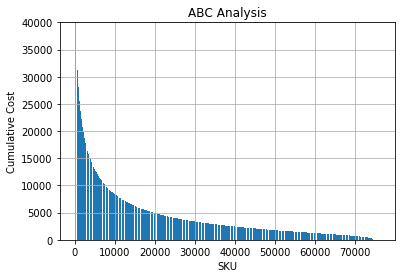

In [39]:
performance = data_sub['CumCost'].tolist()
y_pos = np.arange(len(performance))

plt.bar(y_pos, performance)
plt.ylabel('Cumulative Cost')
plt.xlabel('SKU')
plt.title('ABC Analysis')
plt.grid(True)
plt.ylim((0,40000))
plt.show()

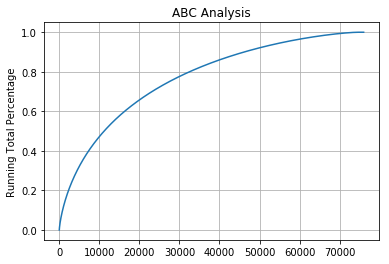

In [34]:
performance = data_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis')
plt.grid(True)
plt.show()

Summary Table

| Class | Total SKUs | Total Cost ($) | Cost Percentage |
|----|-------|------|-------|
| A | 16295 | 205577451 | 60% |
| B | 22288 | 85658215 | 25% |
| C | 37413 | 51396361 | 15% |
| Total | 75996 | 342632027 | 100% |